In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC


df = pd.read_csv('./data/spam.csv')
df.info()
df.shape
df.head()
df.isna().sum()

Text(0.5, 1.0, 'Pie chart')

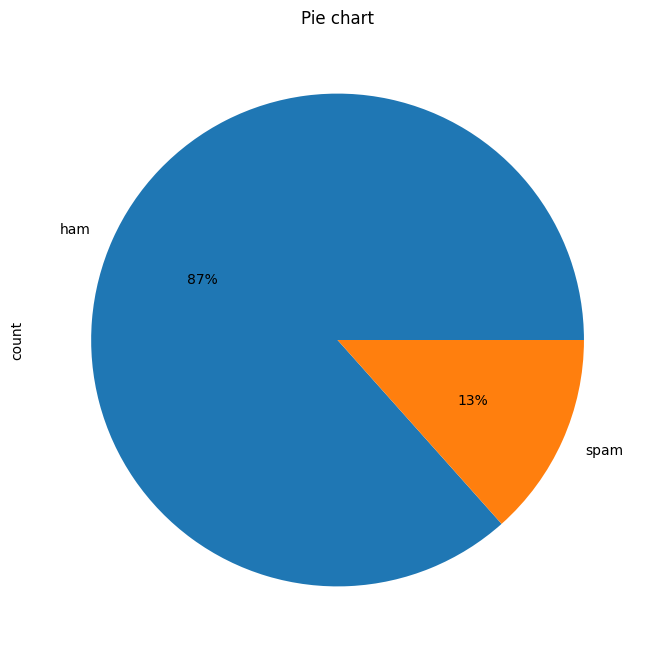

In [16]:
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Pie chart')

In [40]:
x = df['Message'].values
y = df['Category'].values
x

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [20]:
model = SVC(random_state=0)
model.fit(x_train, y_train)

SVC(random_state=0)

In [24]:
model.score(x_test, y_test)
# model.support_vectors_

0.9820627802690582

In [38]:
model.predict(cv.transform(['You have won a lottery of $1000000. Please click on the link to claim your prize']))
model.predict(cv.transform(['I am going to the office']))
# model.predict(cv.transform(['Please sign up here to claim your joining prize!']))

array(['ham'], dtype=object)

In [36]:
document = ["The moonwalking giraffe stole my spaghetti and blamed quantum pickles.",
			"Quantum pickles can’t explain why the giraffe moonwalked into my spaghetti.",
			"Spaghetti, a moonwalking giraffe, and quantum pickles—sounds like a lawsuit."]

vectorizer = CountVectorizer()
vectorizer.fit(document)
print("Vocabulary: ", vectorizer.vocabulary_)
vector = vectorizer.transform(document)
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'the': 16, 'moonwalking': 9, 'giraffe': 4, 'stole': 15, 'my': 10, 'spaghetti': 14, 'and': 0, 'blamed': 1, 'quantum': 12, 'pickles': 11, 'can': 2, 'explain': 3, 'why': 17, 'moonwalked': 8, 'into': 5, 'sounds': 13, 'like': 7, 'lawsuit': 6}
Encoded Document is:
[[1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0]
 [0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1]
 [1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0]]
